In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('NFLX.csv') 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [45]:
df.shape

(1009, 7)

In [46]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


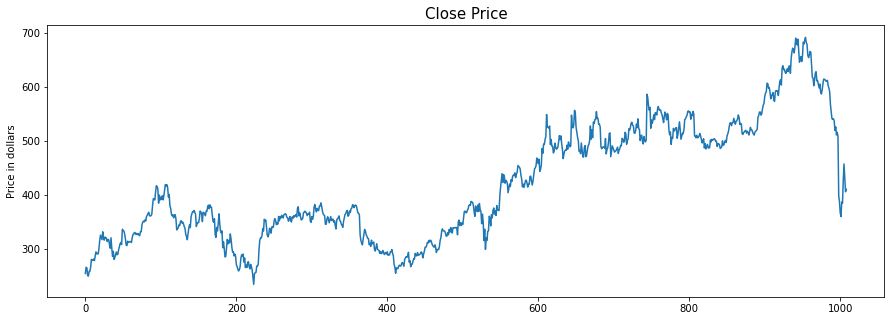

In [48]:
plt.figure(figsize=(15,5)) 
plt.plot(df['Adj Close']) 
plt.title('Close Price', fontsize=15) 
plt.ylabel('Price in dollars') 
plt.show()

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [24]:
df[df['Close'] == df['Adj Close']].shape

(1009, 7)

In [25]:
df = df.drop(['Adj Close'], axis=1)

In [26]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

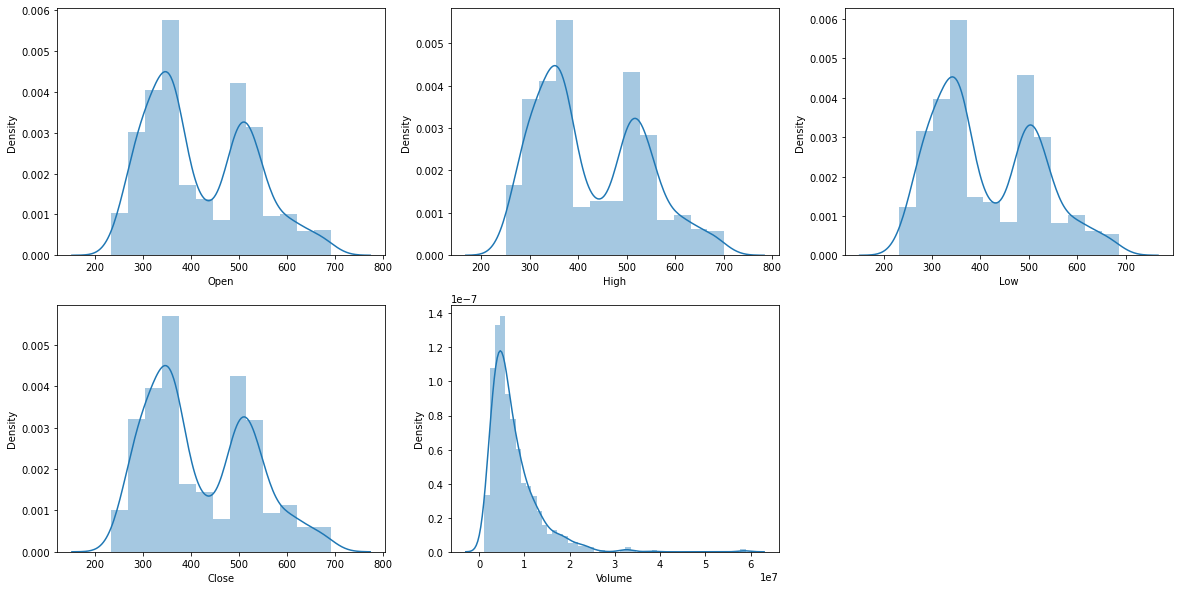

In [30]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10)) 

for i, col in enumerate(features): 
    plt.subplot(2,3,i+1) 
    sb.distplot(df[col]) 
plt.show()

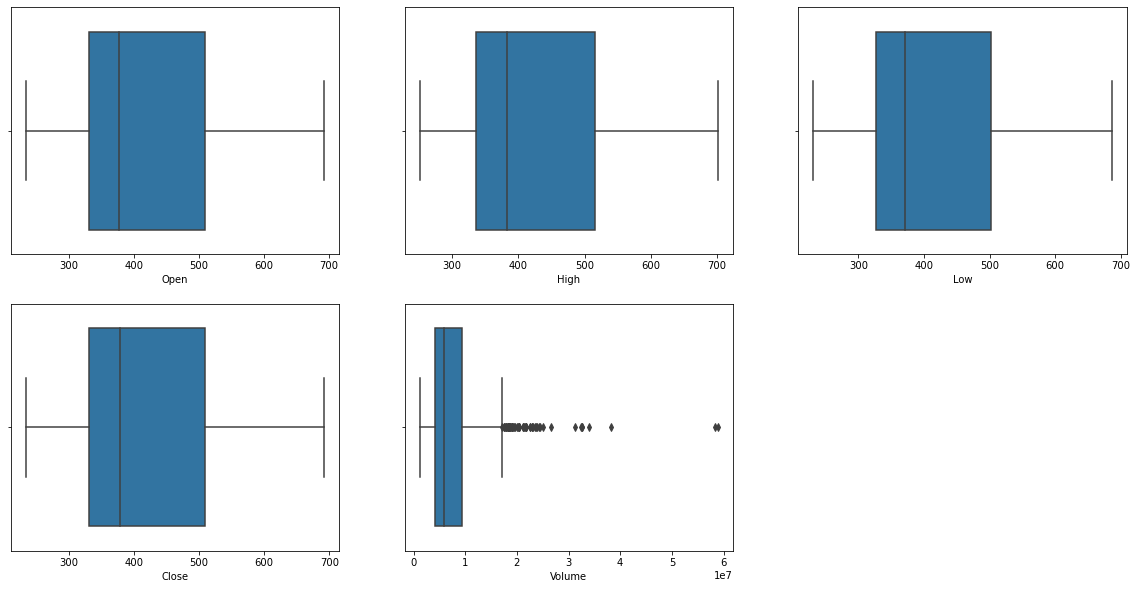

In [31]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
    plt.subplot(2,3,i+1) 
    sb.boxplot(df[col]) 
plt.show()

In [33]:
splitted = df['Date'].str.split('-', expand=True) 

df['day'] = splitted[1].astype('int') 
df['month'] = splitted[0].astype('int') 
df['year'] = splitted[2].astype('int') 

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2,2018,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2,2018,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2,2018,7
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2,2018,8
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2,2018,9


In [34]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2,2018,5,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2,2018,6,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2,2018,7,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2,2018,8,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2,2018,9,0


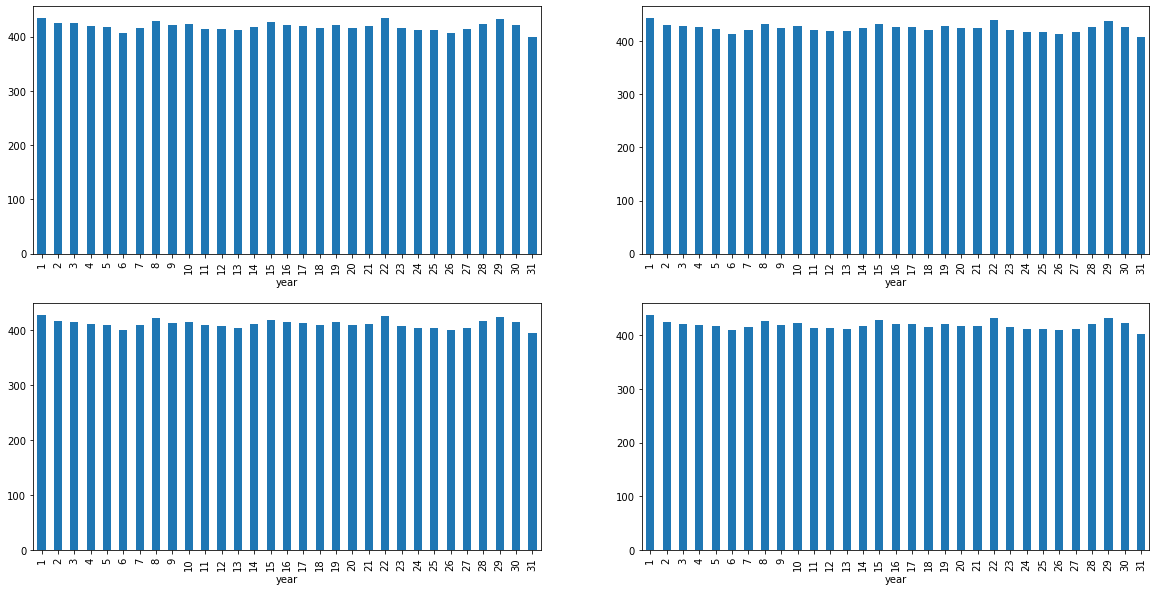

In [35]:
data_grouped = df.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 

for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
    plt.subplot(2,2,i+1) 
    data_grouped[col].plot.bar() 
plt.show()

In [36]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,448.108608,454.981568,440.919864,448.071555,7.315755e+06,6.716235,2019.721692,15.785812
1,341.911595,346.547464,336.562137,341.794528,8.247727e+06,6.072464,2019.260870,15.536232


In [37]:
df['open-close']  = df['Open'] - df['Close'] 
df['low-high']  = df['Low'] - df['High'] 
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

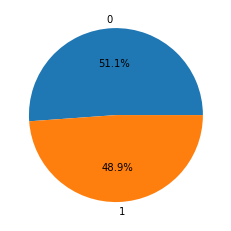

In [38]:
plt.pie(df['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

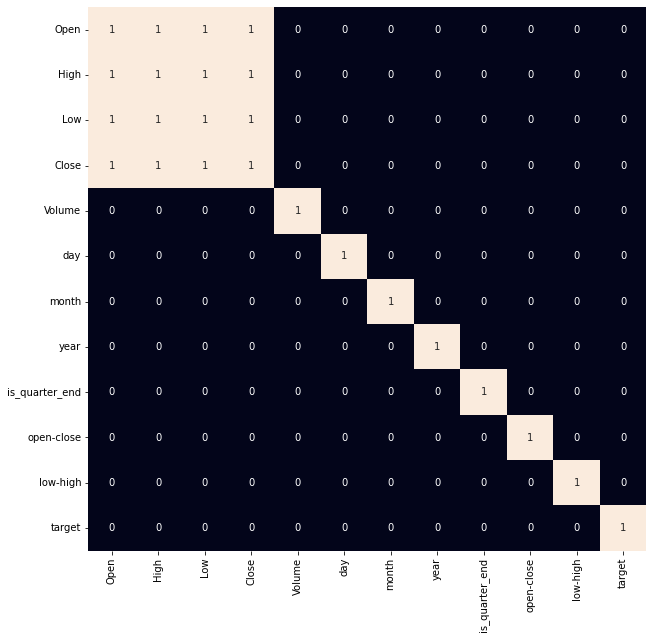

In [39]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False) 
plt.show() 

In [40]:
features = df[['open-close', 'low-high', 'is_quarter_end']] 
target = df['target'] 

scaler = StandardScaler() 
features = scaler.fit_transform(features) 

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape)

(908, 3) (101, 3)


In [41]:
models = [LogisticRegression(), SVC( 
kernel='poly', probability=True), XGBClassifier()] 

for i in range(3): 
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ') 
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1])) 
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1])) 
    print()

LogisticRegression() : 
Training Accuracy :  0.540628417292411
Validation Accuracy :  0.5725741780272654

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5316711623046827
Validation Accuracy :  0.6435445068163593

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

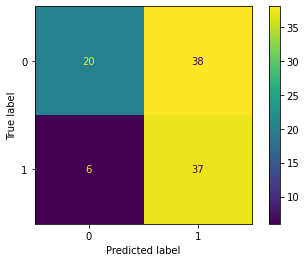

In [42]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid) 
plt.show()